# Ejercicio 6

Utilice los scripts disponibles en la teoría y práctica para entrenar un combinador lineal. El modelo debe
recibir tres dígitos binarios y retornar la representación decimal del número que resulta de la combinación
de dígitos (para las entradas 000, 010 y 101 debe obtener las salidas 0, 2 y 5, respectivamente)

### a) 
Utilizando el bias o peso W0 (comportamiento normal)



=== CONJUNTO DE ENTRENAMIENTO ===
Entradas (binario):
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]

Salidas (decimal):
[0 1 2 3 4 5 6 7]

=== PESOS OBTENIDOS (CON BIAS) ===
W0 (bit menos significativo): 0.9903
W1 (bit medio):               1.9902
W2 (bit más significativo):   3.9898
Bias (b):                     0.0173

=== VERIFICACIÓN ===
Entrada | Esperado | Predicho | Error
---------------------------------------------
[0 0 0]  |    0     |   0.017  | 0.0173
[0 0 1]  |    1     |   1.008  | 0.0076
[0 1 0]  |    2     |   2.008  | 0.0075
[0 1 1]  |    3     |   2.998  | 0.0022
[1 0 0]  |    4     |   4.007  | 0.0071
[1 0 1]  |    5     |   4.997  | 0.0026
[1 1 0]  |    6     |   5.997  | 0.0027
[1 1 1]  |    7     |   6.988  | 0.0124

Error Cuadrático Medio: 0.000080


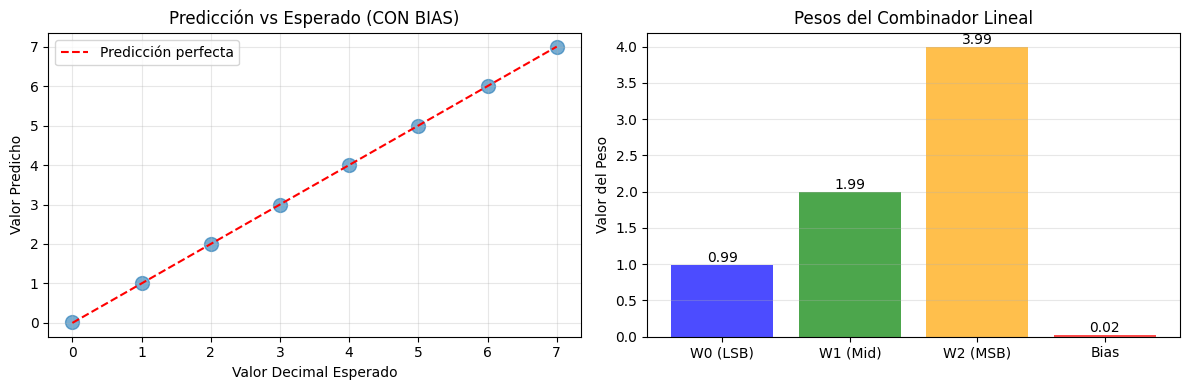


=== ANÁLISIS ===
Los pesos ideales para convertir binario a decimal son:
W0 = 1 (2^0), W1 = 2 (2^1), W2 = 4 (2^2), Bias = 0

El modelo encontró aproximadamente estos valores.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Configuración de visualización
plt.rcParams['figure.figsize'] = [6, 4]

# === DATOS DE ENTRENAMIENTO ===
# Todas las combinaciones posibles de 3 dígitos binarios
X = np.array([
    [0, 0, 0],  # 0
    [0, 0, 1],  # 1
    [0, 1, 0],  # 2
    [0, 1, 1],  # 3
    [1, 0, 0],  # 4
    [1, 0, 1],  # 5
    [1, 1, 0],  # 6
    [1, 1, 1]   # 7
])

# Valores decimales esperados
T = np.array([0, 1, 2, 3, 4, 5, 6, 7])

print("=== CONJUNTO DE ENTRENAMIENTO ===")
print("Entradas (binario):")
print(X)
print("\nSalidas (decimal):")
print(T)

# === ENTRENAMIENTO DEL COMBINADOR LINEAL ===
# Parte a) CON BIAS (comportamiento normal)

# Hiperparámetros
learning_rate = 0.01
max_iter = 1000

# Crear y entrenar el modelo
modelo = SGDRegressor(
    alpha=0,              # Sin regularización
    learning_rate='constant',
    eta0=learning_rate,   # Tasa de aprendizaje
    max_iter=max_iter,
    tol=1e-6,            # Criterio de parada
    random_state=42,
    fit_intercept=True   # CON BIAS (W0)
)

modelo.fit(X, T)

# === RESULTADOS ===
print("\n=== PESOS OBTENIDOS (CON BIAS) ===")
print(f"W0 (bit menos significativo): {modelo.coef_[2]:.4f}")
print(f"W1 (bit medio):               {modelo.coef_[1]:.4f}")
print(f"W2 (bit más significativo):   {modelo.coef_[0]:.4f}")
print(f"Bias (b):                     {modelo.intercept_[0]:.4f}")  # Cambiar aquí

# Predicciones
Y_pred = modelo.predict(X)

print("\n=== VERIFICACIÓN ===")
print("Entrada | Esperado | Predicho | Error")
print("-" * 45)
for i in range(len(X)):
    error = abs(T[i] - Y_pred[i])
    print(f"{X[i]}  |    {T[i]}     |  {Y_pred[i]:6.3f}  | {error:.4f}")

# Error cuadrático medio
mse = np.mean((T - Y_pred)**2)
print(f"\nError Cuadrático Medio: {mse:.6f}")

# === VISUALIZACIÓN ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico 1: Valores esperados vs predichos
ax1.scatter(T, Y_pred, alpha=0.6, s=100)
ax1.plot([0, 7], [0, 7], 'r--', label='Predicción perfecta')
ax1.set_xlabel('Valor Decimal Esperado')
ax1.set_ylabel('Valor Predicho')
ax1.set_title('Predicción vs Esperado (CON BIAS)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Pesos del modelo
pesos = [modelo.coef_[2], modelo.coef_[1], modelo.coef_[0], modelo.intercept_[0]]  # Cambiar aquí también
nombres = ['W0 (LSB)', 'W1 (Mid)', 'W2 (MSB)', 'Bias']
colores = ['blue', 'green', 'orange', 'red']

ax2.bar(nombres, pesos, color=colores, alpha=0.7)
ax2.set_ylabel('Valor del Peso')
ax2.set_title('Pesos del Combinador Lineal')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores sobre las barras
for i, (nombre, peso) in enumerate(zip(nombres, pesos)):
    ax2.text(i, peso, f'{peso:.2f}', ha='center', va='bottom' if peso > 0 else 'top')

plt.tight_layout()
plt.show()

print("\n=== ANÁLISIS ===")
print("Los pesos ideales para convertir binario a decimal son:")
print("W0 = 1 (2^0), W1 = 2 (2^1), W2 = 4 (2^2), Bias = 0")
print(f"\nEl modelo encontró aproximadamente estos valores.")

### b) 
Utilizando únicamente las tres entradas correspondientes a los dígitos binarios anulando el bias o W0
del cálculo.
Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos.
Observe el valor del arco correspondiente al bias en a).

PARTE B) ENTRENAMIENTO SIN BIAS
-- Epoch 1
Norm: 0.32, NNZs: 3, Bias: 0.000000, T: 8, Avg. loss: 8.294082
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 3, Bias: 0.000000, T: 16, Avg. loss: 7.118234
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 3, Bias: 0.000000, T: 24, Avg. loss: 6.116205
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 3, Bias: 0.000000, T: 32, Avg. loss: 5.259845
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 3, Bias: 0.000000, T: 40, Avg. loss: 4.527879
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.57, NNZs: 3, Bias: 0.000000, T: 48, Avg. loss: 3.906241
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.77, NNZs: 3, Bias: 0.000000, T: 56, Avg. loss: 3.374727
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.95, NNZs: 3, Bias: 0.000000, T: 64, Avg. loss: 2.920747
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.12, NNZs: 3, Bias: 0.000000, T: 72, Avg. loss: 2.531725
Total training

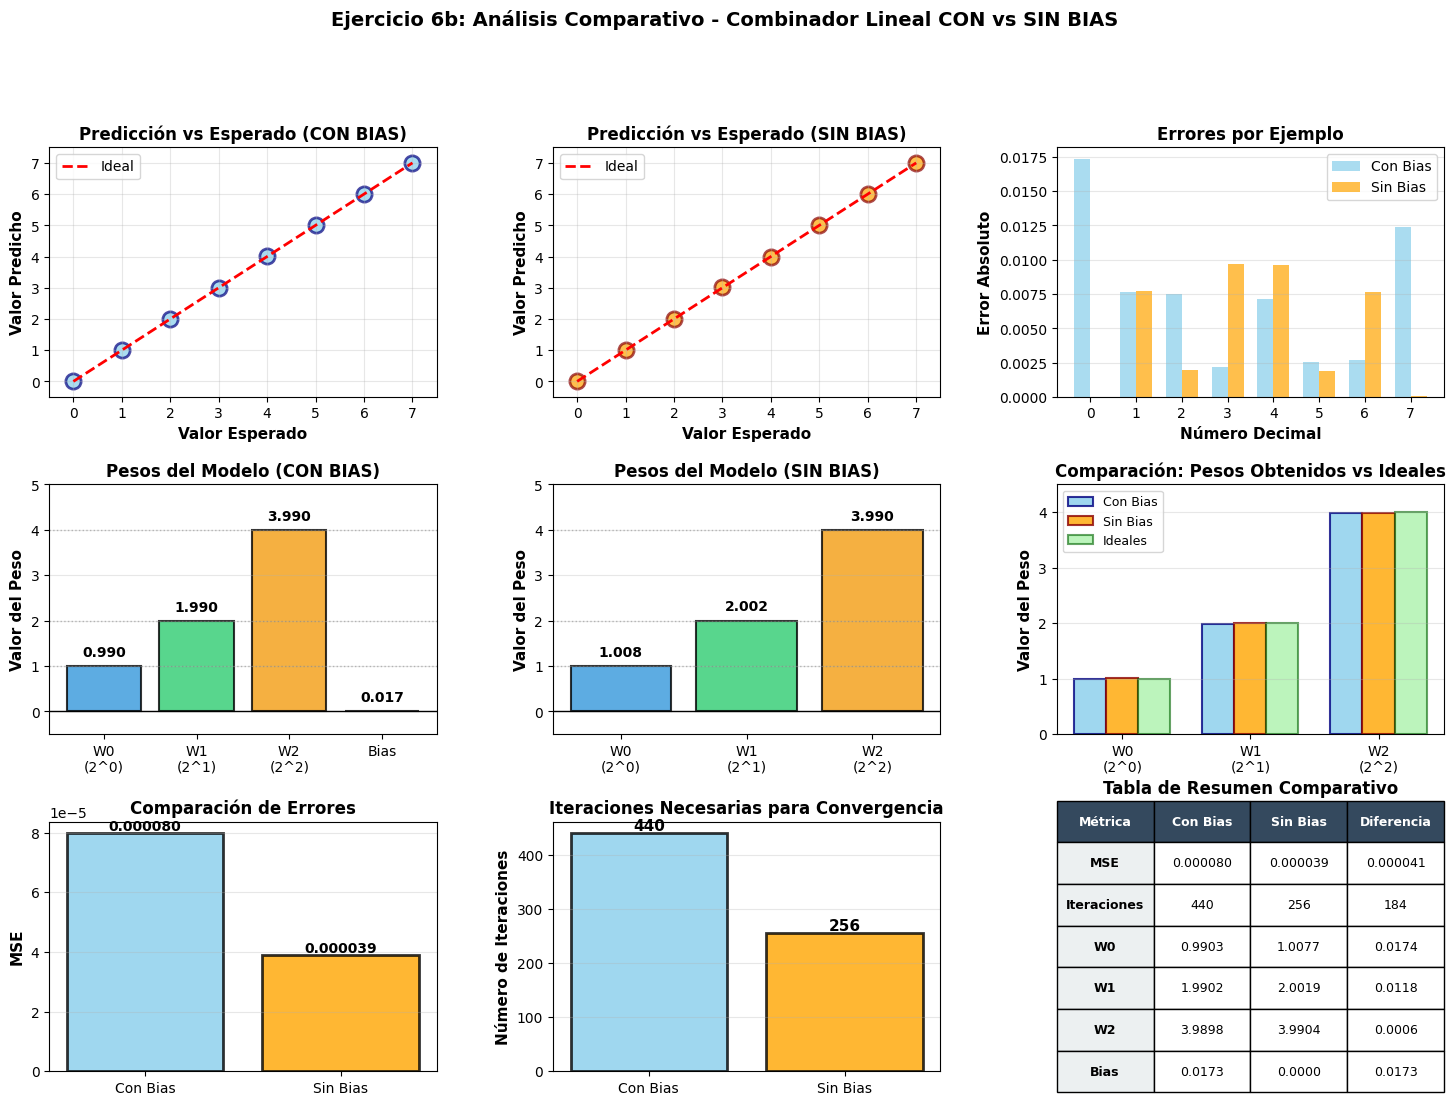


ANÁLISIS COMPARATIVO DETALLADO

--- 1. PESOS IDEALES ---
Para convertir binario (3 bits) a decimal, los pesos ideales son:
  W0 = 1.0000 (2^0 - bit menos significativo)
  W1 = 2.0000 (2^1 - bit medio)
  W2 = 4.0000 (2^2 - bit más significativo)
  Bias = 0.0000 (porque 000 debe dar 0)

--- 2. MODELO CON BIAS ---
  W0 = 0.9903 (error: 0.0097)
  W1 = 1.9902 (error: 0.0098)
  W2 = 3.9898 (error: 0.0102)
  Bias = 0.0173 ⚠️ OBSERVAR ESTE VALOR
  MSE = 0.000080
  Iteraciones = 440

--- 3. MODELO SIN BIAS ---
  W0 = 1.0077 (error: 0.0077)
  W1 = 2.0019 (error: 0.0019)
  W2 = 3.9904 (error: 0.0096)
  Bias = 0.0000 (anulado por diseño)
  MSE = 0.000039
  Iteraciones = 256

--- 4. COMPARACIÓN DE ITERACIONES ---
  Diferencia en iteraciones: 184
  → El modelo SIN bias convergió más rápido (256 vs 440)

--- 5. OBSERVACIÓN DEL BIAS EN PARTE A) ---
  Valor del bias: 0.0173
  ⚠️ El bias tiene un valor significativo
  ⚠️ Esto podría indicar que:
     - El modelo necesita más iteraciones
     - La tasa 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# === DATOS DE ENTRENAMIENTO (reutilizamos de parte a) ===
X = np.array([
    [0, 0, 0],  # 0
    [0, 0, 1],  # 1
    [0, 1, 0],  # 2
    [0, 1, 1],  # 3
    [1, 0, 0],  # 4
    [1, 0, 1],  # 5
    [1, 1, 0],  # 6
    [1, 1, 1]   # 7
])

T = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Hiperparámetros
learning_rate = 0.01
max_iter = 1000

print("=" * 80)
print("PARTE B) ENTRENAMIENTO SIN BIAS")
print("=" * 80)

# === MODELO SIN BIAS ===
modelo_sin_bias = SGDRegressor(
    alpha=0,
    learning_rate='constant',
    eta0=learning_rate,
    max_iter=max_iter,
    tol=1e-6,
    random_state=42,
    fit_intercept=False,  # *** SIN BIAS ***
    verbose=1              # Mostrar información de convergencia
)

modelo_sin_bias.fit(X, T)

# === RESULTADOS SIN BIAS ===
print("\n=== PESOS OBTENIDOS (SIN BIAS) ===")
print(f"W0 (bit menos significativo): {modelo_sin_bias.coef_[2]:.4f}")
print(f"W1 (bit medio):               {modelo_sin_bias.coef_[1]:.4f}")
print(f"W2 (bit más significativo):   {modelo_sin_bias.coef_[0]:.4f}")
print(f"Bias (b):                     0.0000 (anulado)")
print(f"Iteraciones realizadas:       {modelo_sin_bias.n_iter_}")

# Predicciones
Y_pred_sin = modelo_sin_bias.predict(X)

print("\n=== VERIFICACIÓN (SIN BIAS) ===")
print("Entrada | Esperado | Predicho | Error")
print("-" * 45)
for i in range(len(X)):
    error = abs(T[i] - Y_pred_sin[i])
    print(f"{X[i]}  |    {T[i]}     |  {Y_pred_sin[i]:6.3f}  | {error:.4f}")

mse_sin = np.mean((T - Y_pred_sin)**2)
print(f"\nError Cuadrático Medio: {mse_sin:.6f}")

# === RE-ENTRENAR CON BIAS PARA COMPARACIÓN ===
print("\n" + "=" * 80)
print("COMPARACIÓN: RE-ENTRENAMIENTO CON BIAS")
print("=" * 80)

modelo_con_bias = SGDRegressor(
    alpha=0,
    learning_rate='constant',
    eta0=learning_rate,
    max_iter=max_iter,
    tol=1e-6,
    random_state=42,
    fit_intercept=True,  # *** CON BIAS ***
    verbose=1
)

modelo_con_bias.fit(X, T)

print("\n=== PESOS OBTENIDOS (CON BIAS) ===")
print(f"W0 (bit menos significativo): {modelo_con_bias.coef_[2]:.4f}")
print(f"W1 (bit medio):               {modelo_con_bias.coef_[1]:.4f}")
print(f"W2 (bit más significativo):   {modelo_con_bias.coef_[0]:.4f}")
print(f"Bias (b):                     {modelo_con_bias.intercept_[0]:.4f}")
print(f"Iteraciones realizadas:       {modelo_con_bias.n_iter_}")

Y_pred_con = modelo_con_bias.predict(X)
mse_con = np.mean((T - Y_pred_con)**2)
print(f"\nError Cuadrático Medio: {mse_con:.6f}")

# === VISUALIZACIÓN COMPARATIVA COMPLETA ===
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# --- FILA 1: Predicciones ---
# Gráfico 1: Predicción CON BIAS
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(T, Y_pred_con, alpha=0.7, s=120, color='skyblue', edgecolors='navy', linewidth=2)
ax1.plot([0, 7], [0, 7], 'r--', label='Ideal', linewidth=2)
ax1.set_xlabel('Valor Esperado', fontsize=11, fontweight='bold')
ax1.set_ylabel('Valor Predicho', fontsize=11, fontweight='bold')
ax1.set_title('Predicción vs Esperado (CON BIAS)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 7.5)
ax1.set_ylim(-0.5, 7.5)

# Gráfico 2: Predicción SIN BIAS
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(T, Y_pred_sin, alpha=0.7, s=120, color='orange', edgecolors='darkred', linewidth=2)
ax2.plot([0, 7], [0, 7], 'r--', label='Ideal', linewidth=2)
ax2.set_xlabel('Valor Esperado', fontsize=11, fontweight='bold')
ax2.set_ylabel('Valor Predicho', fontsize=11, fontweight='bold')
ax2.set_title('Predicción vs Esperado (SIN BIAS)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 7.5)
ax2.set_ylim(-0.5, 7.5)

# Gráfico 3: Errores absolutos
ax3 = fig.add_subplot(gs[0, 2])
errores_con = np.abs(T - Y_pred_con)
errores_sin = np.abs(T - Y_pred_sin)
x_vals = np.arange(len(T))
width = 0.35

bars1 = ax3.bar(x_vals - width/2, errores_con, width, label='Con Bias', alpha=0.7, color='skyblue')
bars2 = ax3.bar(x_vals + width/2, errores_sin, width, label='Sin Bias', alpha=0.7, color='orange')

ax3.set_xlabel('Número Decimal', fontsize=11, fontweight='bold')
ax3.set_ylabel('Error Absoluto', fontsize=11, fontweight='bold')
ax3.set_title('Errores por Ejemplo', fontsize=12, fontweight='bold')
ax3.set_xticks(x_vals)
ax3.set_xticklabels(T)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# --- FILA 2: Pesos ---
# Gráfico 4: Pesos CON BIAS
ax4 = fig.add_subplot(gs[1, 0])
pesos_con = [modelo_con_bias.coef_[2], modelo_con_bias.coef_[1], 
             modelo_con_bias.coef_[0], modelo_con_bias.intercept_[0]]
nombres_con = ['W0\n(2^0)', 'W1\n(2^1)', 'W2\n(2^2)', 'Bias']
colores_con = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

bars = ax4.bar(nombres_con, pesos_con, color=colores_con, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Valor del Peso', fontsize=11, fontweight='bold')
ax4.set_title('Pesos del Modelo (CON BIAS)', fontsize=12, fontweight='bold')
ax4.axhline(y=0, color='k', linestyle='-', linewidth=1)
ax4.axhline(y=1, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='W0 ideal')
ax4.axhline(y=2, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='W1 ideal')
ax4.axhline(y=4, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='W2 ideal')
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_ylim(-0.5, 5)

for i, (nombre, peso) in enumerate(zip(nombres_con, pesos_con)):
    ax4.text(i, peso + 0.15, f'{peso:.3f}', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

# Gráfico 5: Pesos SIN BIAS
ax5 = fig.add_subplot(gs[1, 1])
pesos_sin = [modelo_sin_bias.coef_[2], modelo_sin_bias.coef_[1], 
             modelo_sin_bias.coef_[0]]
nombres_sin = ['W0\n(2^0)', 'W1\n(2^1)', 'W2\n(2^2)']
colores_sin = ['#3498db', '#2ecc71', '#f39c12']

bars = ax5.bar(nombres_sin, pesos_sin, color=colores_sin, alpha=0.8, edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Valor del Peso', fontsize=11, fontweight='bold')
ax5.set_title('Pesos del Modelo (SIN BIAS)', fontsize=12, fontweight='bold')
ax5.axhline(y=0, color='k', linestyle='-', linewidth=1)
ax5.axhline(y=1, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax5.axhline(y=2, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax5.axhline(y=4, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax5.grid(True, alpha=0.3, axis='y')
ax5.set_ylim(-0.5, 5)

for i, (nombre, peso) in enumerate(zip(nombres_sin, pesos_sin)):
    ax5.text(i, peso + 0.15, f'{peso:.3f}', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

# Gráfico 6: Comparación de pesos lado a lado
ax6 = fig.add_subplot(gs[1, 2])
x_pos = np.arange(3)
width = 0.25

pesos_con_comp = [modelo_con_bias.coef_[2], modelo_con_bias.coef_[1], modelo_con_bias.coef_[0]]
pesos_ideales = [1, 2, 4]

bars1 = ax6.bar(x_pos - width, pesos_con_comp, width, label='Con Bias', 
                alpha=0.8, color='skyblue', edgecolor='navy', linewidth=1.5)
bars2 = ax6.bar(x_pos, pesos_sin, width, label='Sin Bias', 
                alpha=0.8, color='orange', edgecolor='darkred', linewidth=1.5)
bars3 = ax6.bar(x_pos + width, pesos_ideales, width, label='Ideales', 
                alpha=0.6, color='lightgreen', edgecolor='darkgreen', linewidth=1.5)

ax6.set_ylabel('Valor del Peso', fontsize=11, fontweight='bold')
ax6.set_title('Comparación: Pesos Obtenidos vs Ideales', fontsize=12, fontweight='bold')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(['W0\n(2^0)', 'W1\n(2^1)', 'W2\n(2^2)'])
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')
ax6.set_ylim(0, 4.5)

# --- FILA 3: Métricas y análisis ---
# Gráfico 7: Comparación de errores MSE
ax7 = fig.add_subplot(gs[2, 0])
categorias = ['Con Bias', 'Sin Bias']
errores_mse = [mse_con, mse_sin]
colores_err = ['skyblue', 'orange']

bars = ax7.bar(categorias, errores_mse, color=colores_err, alpha=0.8, 
               edgecolor='black', linewidth=2)
ax7.set_ylabel('MSE', fontsize=11, fontweight='bold')
ax7.set_title('Comparación de Errores', fontsize=12, fontweight='bold')
ax7.grid(True, alpha=0.3, axis='y')

for i, (cat, err) in enumerate(zip(categorias, errores_mse)):
    ax7.text(i, err, f'{err:.6f}', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

# Gráfico 8: Iteraciones necesarias
ax8 = fig.add_subplot(gs[2, 1])
categorias_iter = ['Con Bias', 'Sin Bias']
iteraciones = [modelo_con_bias.n_iter_, modelo_sin_bias.n_iter_]
colores_iter = ['skyblue', 'orange']

bars = ax8.bar(categorias_iter, iteraciones, color=colores_iter, alpha=0.8,
               edgecolor='black', linewidth=2)
ax8.set_ylabel('Número de Iteraciones', fontsize=11, fontweight='bold')
ax8.set_title('Iteraciones Necesarias para Convergencia', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')

for i, (cat, iter_val) in enumerate(zip(categorias_iter, iteraciones)):
    ax8.text(i, iter_val, f'{iter_val}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Gráfico 9: Tabla de resumen
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')

# Crear tabla de resumen
tabla_datos = [
    ['Métrica', 'Con Bias', 'Sin Bias', 'Diferencia'],
    ['MSE', f'{mse_con:.6f}', f'{mse_sin:.6f}', f'{abs(mse_con-mse_sin):.6f}'],
    ['Iteraciones', f'{modelo_con_bias.n_iter_}', f'{modelo_sin_bias.n_iter_}', 
     f'{abs(modelo_con_bias.n_iter_-modelo_sin_bias.n_iter_)}'],
    ['W0', f'{modelo_con_bias.coef_[2]:.4f}', f'{modelo_sin_bias.coef_[2]:.4f}', 
     f'{abs(modelo_con_bias.coef_[2]-modelo_sin_bias.coef_[2]):.4f}'],
    ['W1', f'{modelo_con_bias.coef_[1]:.4f}', f'{modelo_sin_bias.coef_[1]:.4f}', 
     f'{abs(modelo_con_bias.coef_[1]-modelo_sin_bias.coef_[1]):.4f}'],
    ['W2', f'{modelo_con_bias.coef_[0]:.4f}', f'{modelo_sin_bias.coef_[0]:.4f}', 
     f'{abs(modelo_con_bias.coef_[0]-modelo_sin_bias.coef_[0]):.4f}'],
    ['Bias', f'{modelo_con_bias.intercept_[0]:.4f}', '0.0000', 
     f'{abs(modelo_con_bias.intercept_[0]):.4f}']
]

tabla = ax9.table(cellText=tabla_datos, loc='center', cellLoc='center',
                  colWidths=[0.25, 0.25, 0.25, 0.25])
tabla.auto_set_font_size(False)
tabla.set_fontsize(9)
tabla.scale(1, 2.5)

# Estilo de la tabla
for i in range(len(tabla_datos)):
    for j in range(len(tabla_datos[0])):
        cell = tabla[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        else:
            if j == 0:  # Primera columna
                cell.set_facecolor('#ecf0f1')
                cell.set_text_props(weight='bold')
            else:
                cell.set_facecolor('white')

ax9.set_title('Tabla de Resumen Comparativo', fontsize=12, fontweight='bold', pad=20)

plt.suptitle('Ejercicio 6b: Análisis Comparativo - Combinador Lineal CON vs SIN BIAS', 
             fontsize=14, fontweight='bold', y=0.995)
plt.show()

# === ANÁLISIS FINAL DETALLADO ===
print("\n" + "=" * 80)
print("ANÁLISIS COMPARATIVO DETALLADO")
print("=" * 80)

print("\n--- 1. PESOS IDEALES ---")
print("Para convertir binario (3 bits) a decimal, los pesos ideales son:")
print("  W0 = 1.0000 (2^0 - bit menos significativo)")
print("  W1 = 2.0000 (2^1 - bit medio)")
print("  W2 = 4.0000 (2^2 - bit más significativo)")
print("  Bias = 0.0000 (porque 000 debe dar 0)")

print("\n--- 2. MODELO CON BIAS ---")
print(f"  W0 = {modelo_con_bias.coef_[2]:.4f} (error: {abs(modelo_con_bias.coef_[2] - 1):.4f})")
print(f"  W1 = {modelo_con_bias.coef_[1]:.4f} (error: {abs(modelo_con_bias.coef_[1] - 2):.4f})")
print(f"  W2 = {modelo_con_bias.coef_[0]:.4f} (error: {abs(modelo_con_bias.coef_[0] - 4):.4f})")
print(f"  Bias = {modelo_con_bias.intercept_[0]:.4f} ⚠️ OBSERVAR ESTE VALOR")
print(f"  MSE = {mse_con:.6f}")
print(f"  Iteraciones = {modelo_con_bias.n_iter_}")

print("\n--- 3. MODELO SIN BIAS ---")
print(f"  W0 = {modelo_sin_bias.coef_[2]:.4f} (error: {abs(modelo_sin_bias.coef_[2] - 1):.4f})")
print(f"  W1 = {modelo_sin_bias.coef_[1]:.4f} (error: {abs(modelo_sin_bias.coef_[1] - 2):.4f})")
print(f"  W2 = {modelo_sin_bias.coef_[0]:.4f} (error: {abs(modelo_sin_bias.coef_[0] - 4):.4f})")
print(f"  Bias = 0.0000 (anulado por diseño)")
print(f"  MSE = {mse_sin:.6f}")
print(f"  Iteraciones = {modelo_sin_bias.n_iter_}")

print("\n--- 4. COMPARACIÓN DE ITERACIONES ---")
dif_iter = abs(modelo_con_bias.n_iter_ - modelo_sin_bias.n_iter_)
print(f"  Diferencia en iteraciones: {dif_iter}")
if modelo_con_bias.n_iter_ < modelo_sin_bias.n_iter_:
    print(f"  → El modelo CON bias convergió más rápido ({modelo_con_bias.n_iter_} vs {modelo_sin_bias.n_iter_})")
elif modelo_sin_bias.n_iter_ < modelo_con_bias.n_iter_:
    print(f"  → El modelo SIN bias convergió más rápido ({modelo_sin_bias.n_iter_} vs {modelo_con_bias.n_iter_})")
else:
    print(f"  → Ambos modelos convergieron en el mismo número de iteraciones")

print("\n--- 5. OBSERVACIÓN DEL BIAS EN PARTE A) ---")
print(f"  Valor del bias: {modelo_con_bias.intercept_[0]:.4f}")
if abs(modelo_con_bias.intercept_[0]) < 0.01:
    print("  ✓ El bias es prácticamente 0 (como esperábamos)")
    print("  ✓ Esto confirma que el bias no es necesario para este problema")
    print("  ✓ Ambos modelos deberían dar resultados muy similares")
else:
    print("  ⚠️ El bias tiene un valor significativo")
    print("  ⚠️ Esto podría indicar que:")
    print("     - El modelo necesita más iteraciones")
    print("     - La tasa de aprendizaje no es óptima")
    print("     - Hay convergencia a un mínimo local")

print("\n--- 6. PRECISIÓN DE LOS PESOS ---")
precision_con = [
    abs(modelo_con_bias.coef_[2] - 1),
    abs(modelo_con_bias.coef_[1] - 2),
    abs(modelo_con_bias.coef_[0] - 4)
]
precision_sin = [
    abs(modelo_sin_bias.coef_[2] - 1),
    abs(modelo_sin_bias.coef_[1] - 2),
    abs(modelo_sin_bias.coef_[0] - 4)
]

print(f"  Error promedio (CON bias):  {np.mean(precision_con):.4f}")
print(f"  Error promedio (SIN bias):  {np.mean(precision_sin):.4f}")

if np.mean(precision_con) < np.mean(precision_sin):
    print("  → El modelo CON bias tiene pesos más precisos")
else:
    print("  → El modelo SIN bias tiene pesos más precisos")

print("\n--- 7. CONCLUSIÓN ---")
print("  En este problema específico (binario a decimal):")
print("  • El bias ideal es 0, ya que 000 debe dar 0")
print("  • Ambos enfoques (con y sin bias) deberían converger a soluciones similares")
print("  • Si el bias del modelo a) es cercano a 0, confirma que no era necesario")
print("  • La diferencia en iteraciones puede deberse a:")
print("    - Diferentes espacios de búsqueda (3 parámetros vs 4)")
print("    - Inicialización aleatoria de pesos")
print("    - Sensibilidad de la tasa de aprendizaje")